**Example 1: Using CLIP for zero-shot Image Classification**

In [1]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image

In [3]:
# import model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
#import processor (text tokenization and image preprocessing)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [47]:
# load image
image = Image.open("../cat_cute.jpg")

# define text classes
#text_classes = ["a photo of a cat", "a photo of a dog"]
#text_classes = ["a photo of a cute cat", "a photo of an ugly cat"]
text_classes = ["a photo of a cat meme", "a photo of a cat", "a girl cat"]



In [48]:
# pass image and text claasses to the processor
inputs = processor(text=text_classes, images=image, return_tensors="pt", padding=True)

# pass inputs to CLIP
outputs = model(**inputs) # ** unpacks dictionary items

In [49]:
# image-text similarity score
logits_per_image = outputs.logits_per_image

# convert scores to probs via softmax
probs = logits_per_image.softmax(dim=1)

In [50]:
predicted_class= text_classes[probs.argmax()]
print(predicted_class, "| Probabilty = ",
      round(float(probs[0][probs.argmax()]),2))

a girl cat | Probabilty =  0.62


**Example 2: Using CLIP for Image Search**

In [29]:
image_name_list = ["../cat_cute.jpg", "../DOG.jpg", "../GOAT.jpg"]
image_list =[]
for image_name in image_name_list:
  image_list.append(Image.open(image_name))
#


In [45]:
query = "a cute pet"

inputs = processor(text=query, images=image_list, return_tensors="pt", padding=True)
outputs = model(**inputs)
logits_per_text = outputs.logits_per_text
probs = logits_per_text.softmax(dim=1)


/content/cat_cute.jpg
Match probability =  0.98


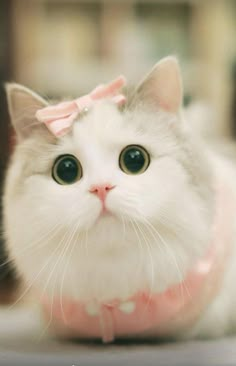

In [46]:
best_match_idx = probs.argmax()
print(image_name_list[best_match_idx])

best_match = image_list[probs.argmax()]
prob_match = round(float(probs[0][probs.argmax()]),2)
print("Match probability = ", prob_match)
display(best_match)
#